In [346]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin

DYSKRETYZACJA

zadanie 1 i 2

In [347]:
def dyskretyzacja(f, Fs):
    t = np.arange(0, 1, 1 / Fs)
    s = np.sin(2 * np.pi * f * t)

    return t, s

zadanie 3

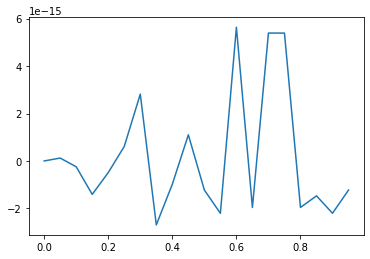

In [348]:
x, y = dyskretyzacja(10, 20)
plt.plot(x, y)

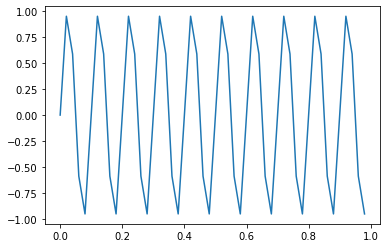

In [349]:
x, y = dyskretyzacja(10, 50)
plt.plot(x, y)

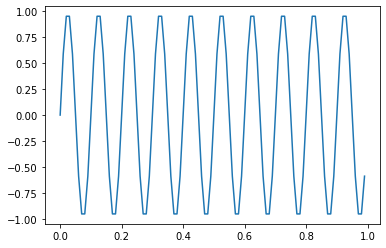

In [350]:
x, y = dyskretyzacja(10, 100)
plt.plot(x, y)

zadanie 4

twierdzenie Nyquista–Shannona

zadanie 5

zjawisko aliasingu

zadanie 6

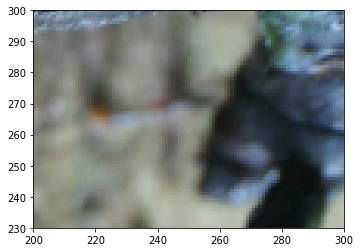

In [351]:
image = plt.imread('./robal.png')
plt.xlim(200, 300)
plt.ylim(230, 300)
plt.imshow(image)

KWANTYZACJA

zadanie 2

In [352]:
f"Liczba wymiarów wczytanej macierzy: {image.ndim}"

'Liczba wymiarów wczytanej macierzy: 3'

zadanie 3

In [353]:
f"Najgłębszy wymiar składa się z {len(image[0][0])} wartości"

'Najgłębszy wymiar składa się z 3 wartości'

zadanie 4

In [354]:
R = image[ :, :, 0]
G = image[ :, :, 1]
B = image[ :, :, 2]

wyznaczenie jasności piksela

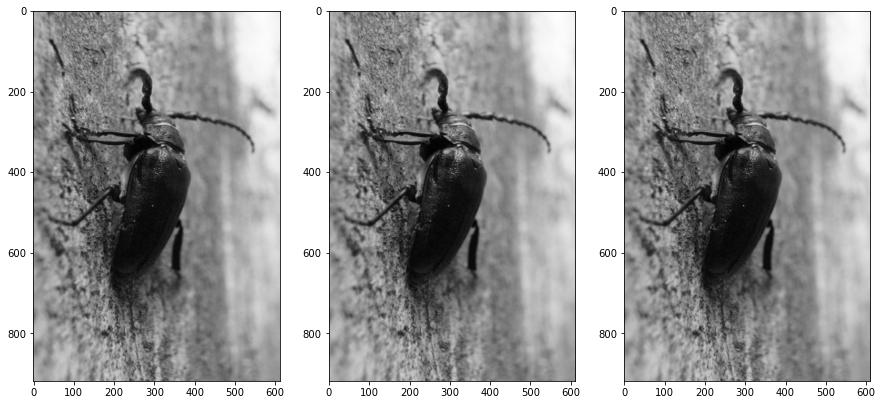

In [355]:
szarosc1 = (np.maximum(R, B, G) + np.minimum(R, B, G)) / 2
szarosc2 = (R + G + B) / 3
szarosc3 = .21 * R + .72 * G + .07 * B

fix, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(szarosc1, cmap=plt.get_cmap('gray'))
axs[1].imshow(szarosc2, cmap=plt.get_cmap('gray'))
axs[2].imshow(szarosc3, cmap=plt.get_cmap('gray'))



Uśrednienie wartości piksela

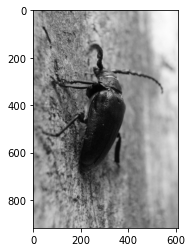

In [356]:

plt.imshow(szarosc2, cmap=plt.get_cmap('gray'))

Wyznaczenie luminacji piksela

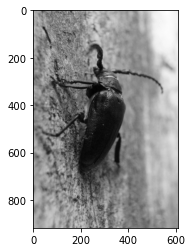

In [357]:
szarosc3 = .21 * R + .72 * G + .07 * B
plt.imshow(szarosc3, cmap=plt.get_cmap('gray'))

zadanie 5